<a href="https://colab.research.google.com/github/Faisal-Al-Mamun/Pedestrian-Detection-from-Video-Files-using-OpenCV/blob/main/Pedestrian_Detection_from_Video_Files_using_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

### Loading Body classifier from Google Drive in Google Colab

In [5]:
# Create our body classifier
body_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/Dataset/Haarcascades/haarcascade_fullbody.xml')

### Pedistrian Detection

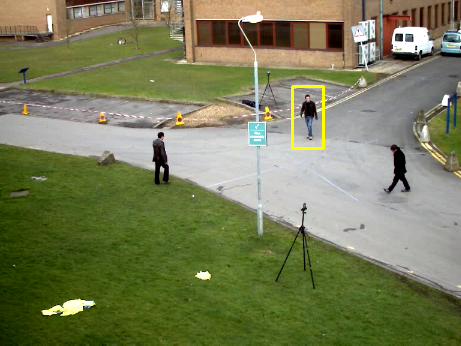

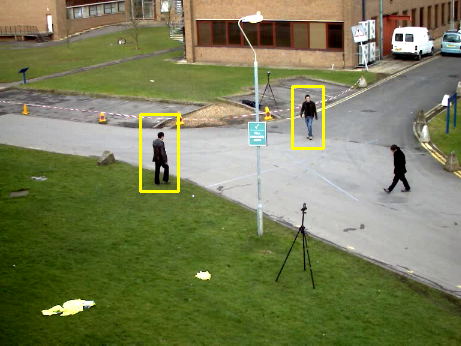

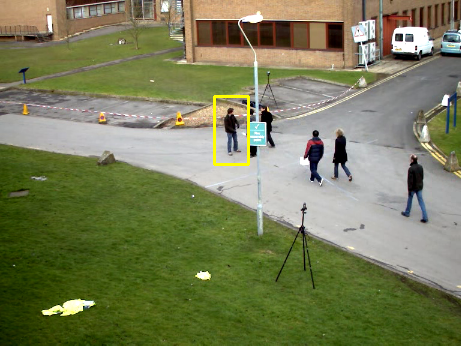

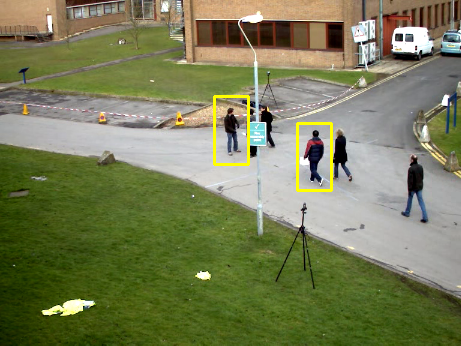

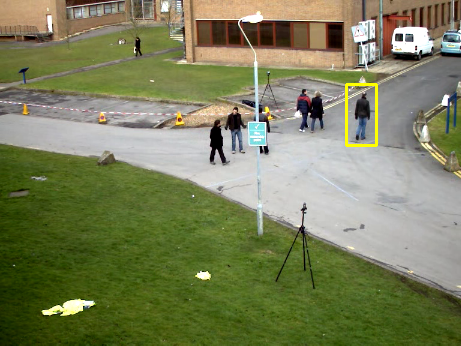

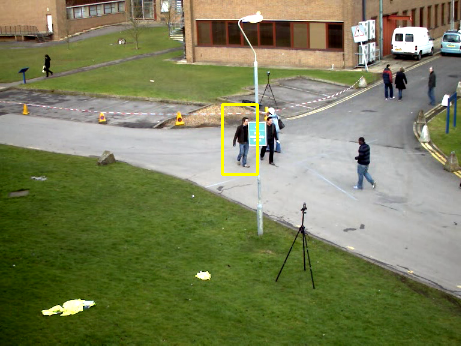

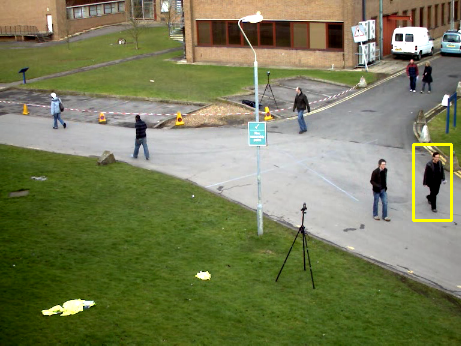

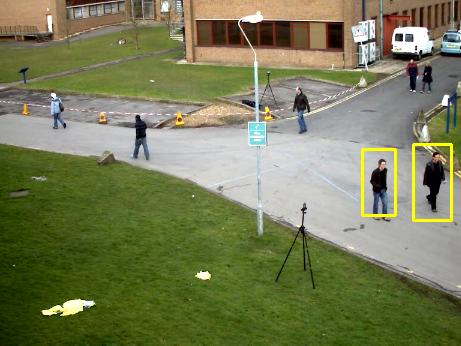

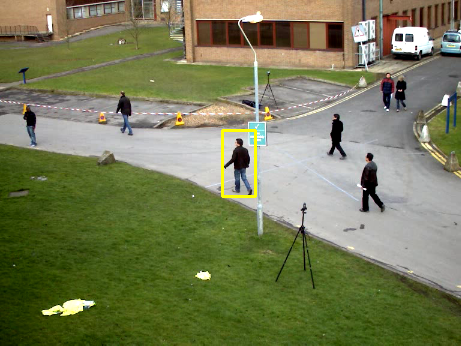

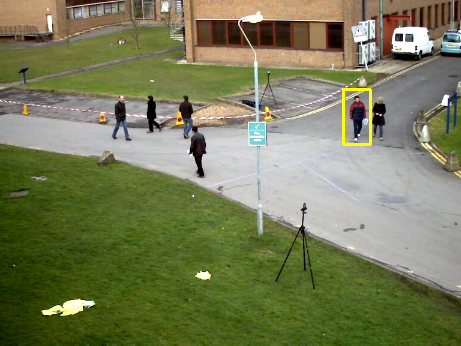

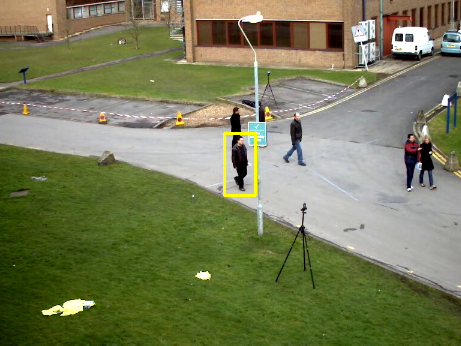

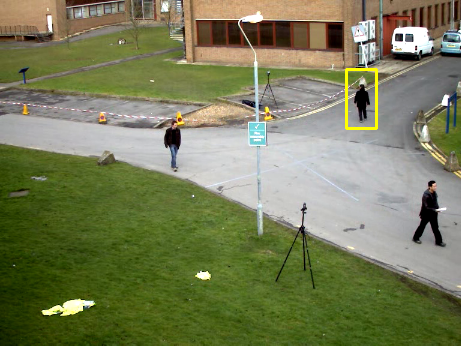

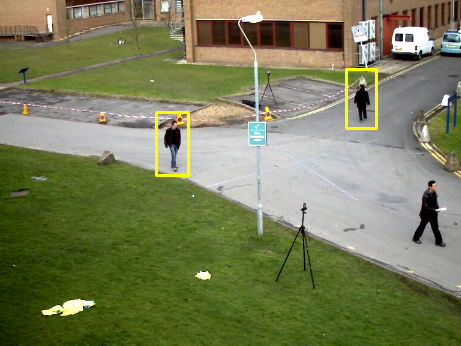

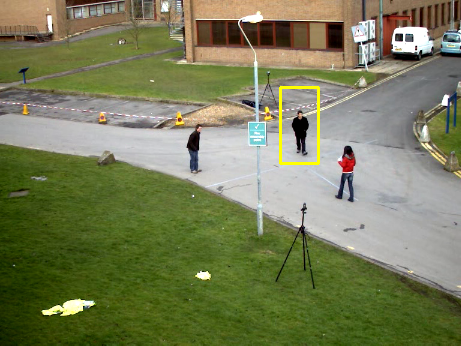

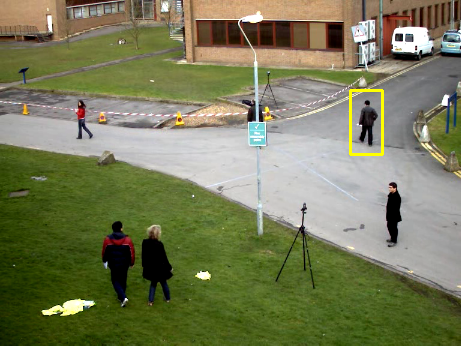

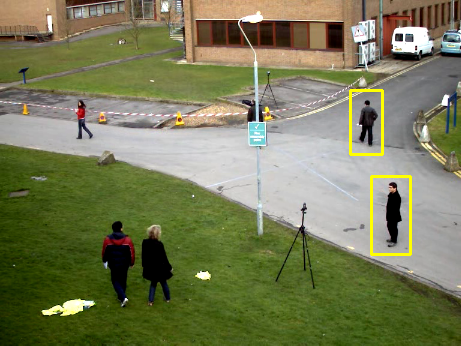

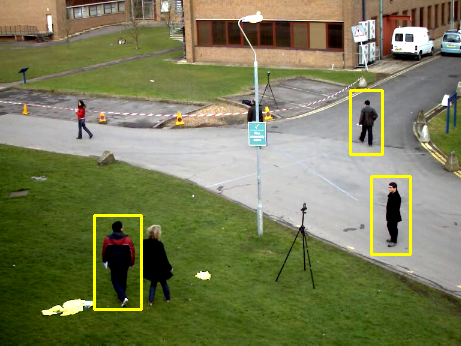

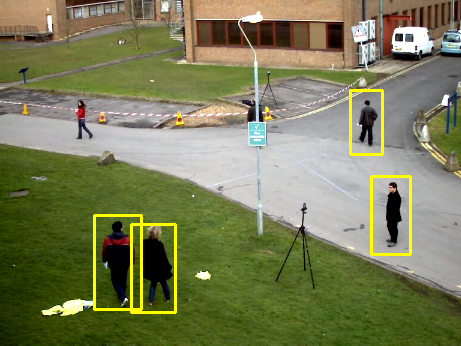

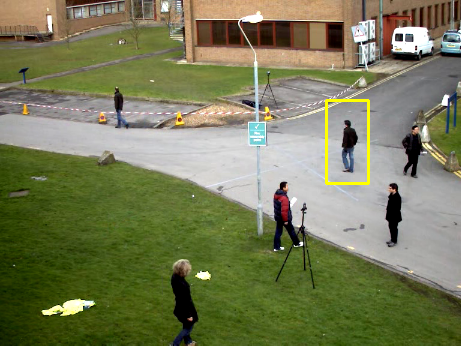

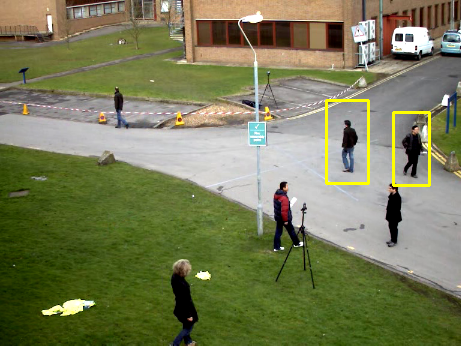

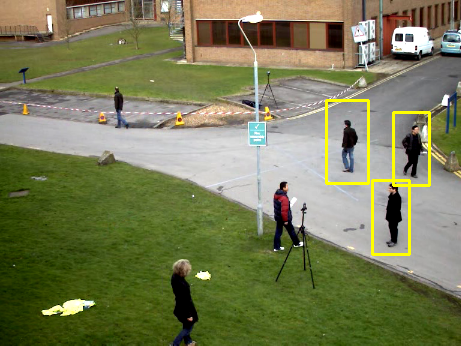

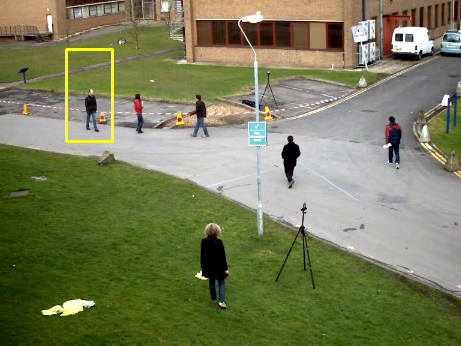

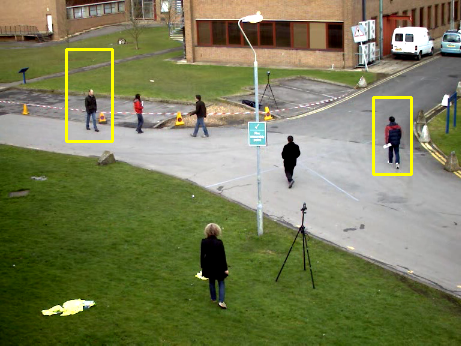

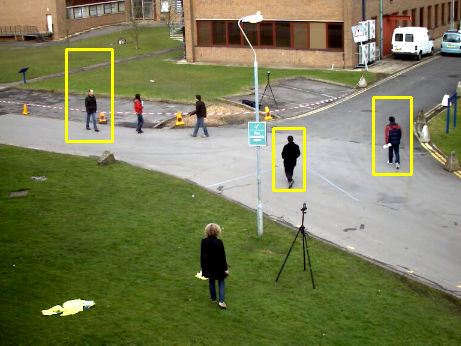

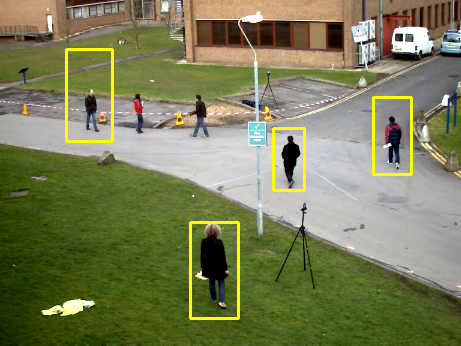

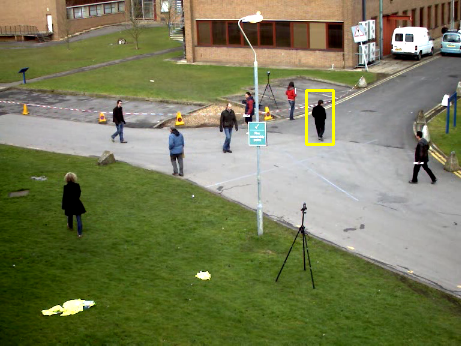

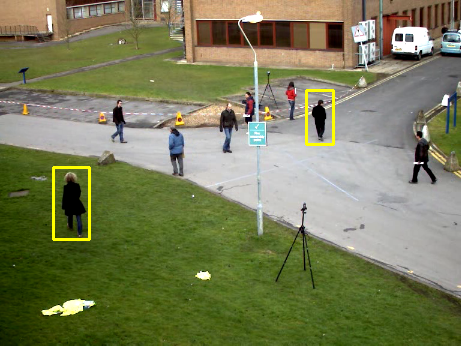

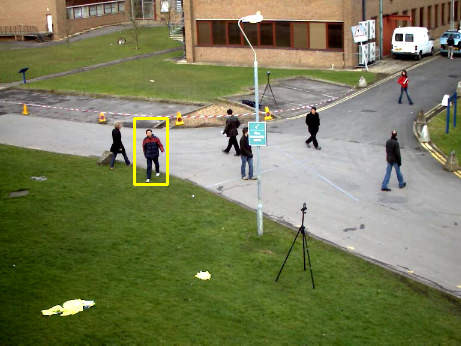

Video Ended


In [6]:
# Initiate video capture for video file
cap = cv2.VideoCapture('/content/drive/MyDrive/Colab Notebooks/Dataset/walking.avi')

# Loop once video is successfully loaded
while cap.isOpened():
    video_cur_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)   # Index of the frame to be decoded/captured next
    # Read first frame
    ret, frame = cap.read()
    if ret == True:
        frame = cv2.resize(frame, None, fx=0.6, fy=0.6)
    if ret == False:
        print("Video Ended")
        break
    #frame = cv2.resize(frame, None,fx=0.5, fy=0.5, interpolation = cv2.INTER_LINEAR)

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Pass frame to our body classifier
    bodies = body_classifier.detectMultiScale(gray, 1.2, 3)
    
    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2_imshow(frame)
        #cv2.imshow('Pedestrians',frame)

    cap.set(cv2.CAP_PROP_POS_FRAMES, video_cur_frame + 50) # jump 50 frames
   # if cv2.waitKey(1) < 0:
    if cv2.waitKey(1) & 0xFF == 27:
      break

cv2.waitKey(0)
cap.release()
cv2.destroyAllWindows()